### Income Dataset
### Perform Binary Classification to predict if Salary is greater than $50K 

In [1]:
%pip install kaggle

  Using cached kaggle-1.6.12.tar.gz (79 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7
  Running setup.py install for kaggle: started
  Running setup.py install for kaggle: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: kaggle is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for kaggle did not run successfully.
  │ exit code: 1
  ╰─> [127 lines of output]
      c:\Python310\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running install
      c:\Python310\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running

## Setup

### Import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as mp

### Load the dataset

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Train dataset shape:", train_data.shape)
print("Test dataset shape:", test_data.shape)

Train dataset shape: (43957, 15)
Test dataset shape: (899, 14)


## Explore features

<h3>Data Columns Explanation</h3>

<ul>
  <li><strong>Age:</strong> Age of the person.</li>
  <li><strong>Workclass:</strong> Categorical variable indicating the type of work, e.g., Government or Private.</li>
  <li><strong>Fnlwgt:</strong> Final weight, a demographic weighting variable.</li>
  <li><strong>Education:</strong> Education level of the person.</li>
  <li><strong>Educational-num:</strong> Education represented as an integer.</li>
  <li><strong>Marital-status:</strong> Marital status of the person.</li>
  <li><strong>Occupation:</strong> Occupation of the person or job title.</li>
  <li><strong>Relationship:</strong> Relationship status of the person.</li>
  <li><strong>Race:</strong> Race of the person.</li>
  <li><strong>Gender:</strong> Gender of the person.</li>
  <li><strong>Capital-gain:</strong> Capital gain.</li>
  <li><strong>Capital-loss:</strong> Capital loss.</li>
  <li><strong>Hours-per-week:</strong> Hours worked per week.</li>
  <li><strong>Native-country:</strong> Native country of the person.</li>
  <li><strong>Income_>50K:</strong> Target column indicating whether the income is greater than $50K.</li>
</ul>


In [4]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


## Data Cleaning

### Check duplicates & drop them

In [6]:
train_data.duplicated().sum()

45

In [7]:
train_data.drop_duplicates(inplace=True)
train_data.duplicated().sum()

0

### Check null values & fill them

In [8]:
train_data.isnull().sum()

age                   0
workclass          2494
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2502
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [9]:
# Replace missing values in 'workclass' column with mode
workclass_mode = train_data['workclass'].mode()[0]
train_data['workclass'].fillna(workclass_mode, inplace=True)
test_data['workclass'].fillna(workclass_mode, inplace=True)

# Replace missing values in 'occupation' column with mode
occupation_mode = train_data['occupation'].mode()[0]
train_data['occupation'].fillna(occupation_mode, inplace=True)
test_data['occupation'].fillna(occupation_mode, inplace=True)

# Replace missing values in 'native-country' column with mode
native_country_mode = train_data['native-country'].mode()[0]
train_data['native-country'].fillna(native_country_mode, inplace=True)
test_data['native-country'].fillna(native_country_mode, inplace=True)


C:\Users\PCD\AppData\Local\Temp\ipykernel_15548\395418243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['workclass'].fillna(workclass_mode, inplace=True)
C:\Users\PCD\AppData\Local\Temp\ipykernel_15548\395418243.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
train_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

### Check if the data is balanced or not 

(array([33399.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10513.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

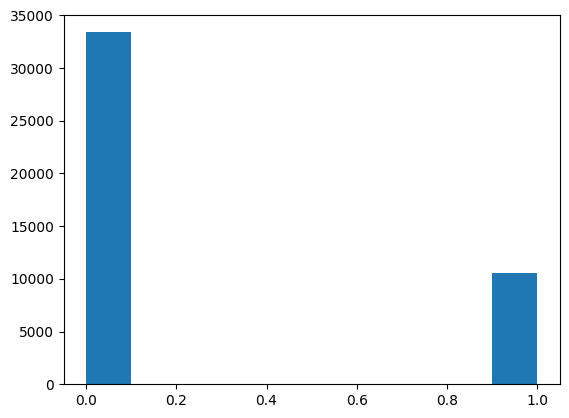

In [11]:
train_data["income_>50K"].value_counts()
mp.hist(train_data["income_>50K"])

### Undersampling

In [12]:
selected_zero_columns = train_data.loc[train_data['income_>50K'] == 0].iloc[:, :10000].drop(columns='fnlwgt')
selected_one_columns = train_data.loc[train_data['income_>50K'] == 1].iloc[:, :10000].drop(columns='fnlwgt')
final_data = pd.concat([selected_zero_columns,selected_one_columns])
final_data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
3,58,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,39,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1
43943,53,Private,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1
43946,47,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
43948,44,Private,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,8614,0,40,United-States,1


## Normalize & encode columns

In [13]:
# Identify numerical and categorical columns
numerical_cols = final_data.select_dtypes(include='number').columns
categorical_cols = final_data.select_dtypes(include='object').columns

# Normalize numerical columns
scaler = MinMaxScaler()
final_data[numerical_cols] = scaler.fit_transform(final_data[numerical_cols])

# encode categorical columns
X = pd.get_dummies(final_data, columns=categorical_cols)
print("Preprocessed dataset:", X.shape)

Preprocessed dataset: (43912, 105)


In [14]:
X

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1,0.000000,0.466667,0.000000,0.0,0.142857,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.561644,0.200000,0.000000,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.109589,0.600000,0.000000,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.575342,0.533333,0.000000,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.726027,0.266667,0.026530,0.0,0.397959,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,0.301370,0.533333,0.072981,0.0,0.479592,1.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
43943,0.493151,0.133333,0.076881,0.0,0.091837,1.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
43946,0.410959,0.800000,0.000000,0.0,0.397959,1.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
43948,0.369863,0.666667,0.086141,0.0,0.397959,1.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


## Separate `input features` and `target variable`

In [15]:
X = final_data.drop('income_>50K', axis=1)
y = final_data['income_>50K']